<a href="https://colab.research.google.com/github/MaryM12/Statistics_and_R_IB/blob/homework_lecture_5/homework/code/Molodova_homework_lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [ ]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
!gdown 1z55qjD_4bsvrtP6BdoaKqhNm11Je6CdK

Downloading...
From: https://drive.google.com/uc?id=1z55qjD_4bsvrtP6BdoaKqhNm11Je6CdK
To: /content/homework_lecture_5_data.csv
100% 174M/174M [00:00<00:00, 225MB/s]


In [69]:
# В переменную data_path надо положить путь до данных
data_path = "/content"
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()


,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [45]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")
b_cells_expression_data.shape[0]

500

In [46]:
nk_cells_expression_data.shape[0]

500

500 наблюдений для каждого типа клеток.

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [25]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

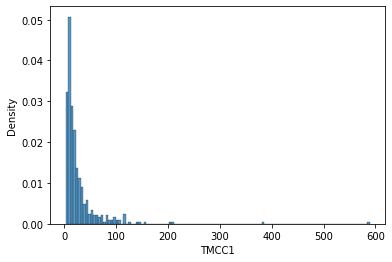

In [26]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

In [28]:
mu_b = b_cells_expression_data[example_gene].mean()
sigma_b = b_cells_expression_data[example_gene].std()

print(f"mu_b: {mu_b}, sigma_b: {sigma_b}")

mu: 26.978971829200002, sigma: 40.5017332409003


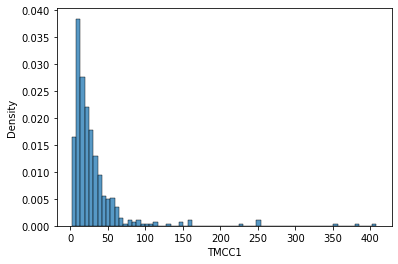

In [27]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

In [29]:
mu_nk = nk_cells_expression_data[example_gene].mean()
sigma_nk = nk_cells_expression_data[example_gene].std()

print(f"mu_nk: {mu_nk}, sigma_nk: {sigma_nk}")

mu: 30.4313196004, sigma: 40.80350349863318


Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [32]:
def demonstrate_clt(expressions, sample_size, n_samples):
  mean_expressions = []
  for i in range(n_samples):
      sample = np.random.choice(expressions, size=sample_size)
      mean_expressions.append(np.mean(sample))
  return mean_expressions

In [113]:
b_mean_expressions = demonstrate_clt(b_cells_expression_data[example_gene], sample_size = 200, n_samples = 100)

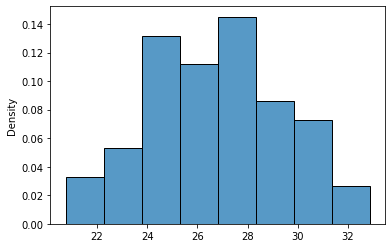

In [114]:
sns.histplot(b_mean_expressions, stat="density");

In [115]:
nk_mean_expressions = demonstrate_clt(nk_cells_expression_data[example_gene], sample_size = 200, n_samples = 100)

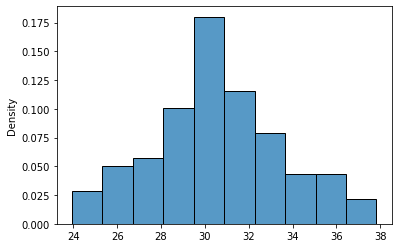

In [116]:
sns.histplot(nk_mean_expressions, stat="density");

In [117]:
np.mean(b_mean_expressions)

26.697320226855

In [118]:
np.median(b_mean_expressions)

26.848299620749998

In [119]:
np.mean(nk_mean_expressions)

30.622118377919996

In [120]:
np.median(nk_mean_expressions)

30.427404353

Отличаются ли средние экспрессии данного гена у этих клеточных типов? Кажется, что отличаются. Но чтобы сделать вывод, нужно применить статистический тест.

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [ ]:
#Буду считать на основе сгенерированных выборок (результаты не очень точные, т.к. размер выборок меньше ГС).

In [121]:
sample_size=200
se_b = sigma_b / np.sqrt(sample_size)
se_b

2.8639050224449205

In [122]:

se_nk = sigma_nk / np.sqrt(sample_size)
se_nk

2.8852434020052535

In [123]:
mean_mean_b = np.mean(b_mean_expressions)
left_b = mean_mean_b - 1.96 * se_b
right_b = mean_mean_b + 1.96 * se_b

left_b, right_b

(21.084066382862954, 32.31057407084704)

In [124]:
mean_mean_nk = np.mean(nk_mean_expressions)
left_nk = mean_mean_nk - 1.96 * se_nk
right_nk = mean_mean_nk + 1.96 * se_nk

left_nk, right_nk

(24.9670413099897, 36.277195445850296)

 Интервалы пересекаются, и сильно => средняя экспрессия данного гена отличается между клеточными типами.

## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [60]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [ ]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(23.420272072079296, 30.53767158632071)

In [ ]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(26.84610468807562, 34.01653451272438)

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [67]:
def check_intervals_intersect(first_ci, second_ci):   
  are_intersect = first_ci[0] < second_ci[0] < first_ci[1] or second_ci[0] < first_ci[0] < second_ci[1]
  return are_intersect

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

In [92]:
len(expression_data.columns)

18793

In [139]:
ci_test_results = []
for i in range(18792): #итерация по генам
  #CI для B-клеток
  b_ci = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data.iloc[:, i]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data.iloc[:, i]), # Среднее
              scale=st.sem(b_cells_expression_data.iloc[:, i])) # Стандартная ошибка среднего
  #CI для NK-клеток
  nk_ci = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data.iloc[:, i]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data.iloc[:, i]), # Среднее
              scale=st.sem(nk_cells_expression_data.iloc[:, i])) # Стандартная ошибка среднего
  ci_test_result = check_intervals_intersect(b_ci, nk_ci)
  ci_test_results.append(ci_test_result)



In [91]:
sum(ci_test_results) / len(ci_test_results)

0.7978395061728395

Для ~80% генов пересекаются.

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

(На вход должны подаваться две таблицы с экспрессиями в 2 разных клеточных типах. Одинаковое число колонок. Номера колонок с одинаковыми генами совпадают. Во всех колонках только числовые значения по экспрессии. Надеюсь, правильно поняла))

In [140]:
def check_dge_with_ci(first_table, second_table):
  ci_test_results = []
  col_n = len(first_table.columns)
  for i in range(col_n): #итерация по генам
    #для 1ой таблицы
    ci_1 = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(first_table.iloc[:, i]) - 1, # число степеней свободы - 1
              loc=np.mean(first_table.iloc[:, i]), # Среднее
              scale=st.sem(first_table.iloc[:, i])) # Стандартная ошибка среднего
    #CI для 2ой таблицы
    ci_2 = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(second_table.iloc[:, i]) - 1, # число степеней свободы - 1
              loc=np.mean(second_table.iloc[:, i]), # Среднее
              scale=st.sem(second_table.iloc[:, i])) # Стандартная ошибка среднего
    ci_test_result = check_intervals_intersect(ci_1, ci_2)
    ci_test_results.append(ci_test_result)
  return ci_test_results

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [95]:
from statsmodels.stats.weightstats import ztest

In [96]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

0.17935507499860204 > 0.05 - экспрессия гена не отличается значимо между клеточными линиями.

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [126]:
def check_dge_with_ztest(first_table, second_table):
    z_test_results = []
    for i in first_table.columns:
      z_test_result = ztest(first_table[i], second_table[i])[1] < 0.05
      z_test_results.append(z_test_result)
    return z_test_results

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [ ]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [ ]:
# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

Смотри файл DE_tool.py 


## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)

О проекте 1 по практике) Но скрина не осталось(